# 使用手寫辨識資料集, 觀察 PCA 算法

# [教學目標]
- 以 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化
- 因為非監督模型的效果, 較難以簡單的範例看出來  
  所以非監督偶數日提供的範例與作業, 主要目的在於觀察非監督模型的效果,  
  同學只要能感受到模型效果即可, 不用執著於搞懂程式的每一個部分

# [範例重點]
- 以手寫辨識資料集, 觀察 PCA 算法取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [1]:
# 載入套件
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [2]:
# 載入手寫數字辨識集
digits = datasets.load_digits()
X = digits.data
y = digits.target
print('X:\n', X[:3])
print()
print('y:\n', y[:10])
print()
print('unique y:\n', np.unique(y))

X:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]]

y:
 [0 1 2 3 4 5 6 7 8 9]

unique y:
 [0 1 2 3 4 5 6 7 8 9]


In [3]:
# 定義 PCA 與隨後的邏輯斯迴歸函數，並執行 GridSearchCV 跑出最佳參數
pca = PCA()
pca.fit(X)
pipe = Pipeline(steps=[
    ('pca', PCA(),),
    ('logistic', SGDClassifier(loss='log', penalty='l2', max_iter=30000, tol=1e-5, random_state=0),)
])
param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, cv=5, iid=False, return_train_score=False)
search.fit(X, y)
print('Best parameter (CV score={:.3f}): {}'.format(search.best_score_, search.best_params_))

Best parameter (CV score=0.915): {'logistic__alpha': 0.01, 'pca__n_components': 50}


In [4]:
search_results = pd.DataFrame(search.cv_results_)
search_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.141656,0.050577,0.001000,3.234067e-07,0.0001,4,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.766484,0.596685,0.651811,0.745098,0.667606,0.685537,0.062376,25
1,0.083580,0.023407,0.001000,1.144409e-06,0.0001,10,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.898352,0.853591,0.891365,0.910364,0.825352,0.875805,0.031571,17
2,0.082175,0.017160,0.000798,3.990312e-04,0.0001,20,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.914835,0.867403,0.913649,0.938375,0.884507,0.903754,0.024945,13
3,0.109967,0.020437,0.000801,4.002827e-04,0.0001,30,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.917582,0.856354,0.924791,0.957983,0.887324,0.908807,0.034536,12
4,0.102968,0.026846,0.000800,3.998997e-04,0.0001,40,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.914835,0.872928,0.930362,0.938375,0.890141,0.909328,0.024534,9


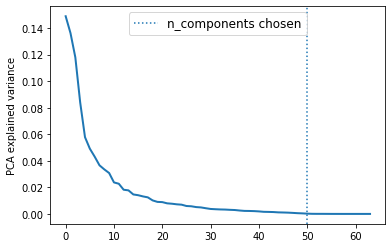

In [5]:
# 繪製不同 components 的 PCA 解釋度
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
plt.ylabel('PCA explained variance')
plt.legend(prop=dict(size=12))
plt.show()

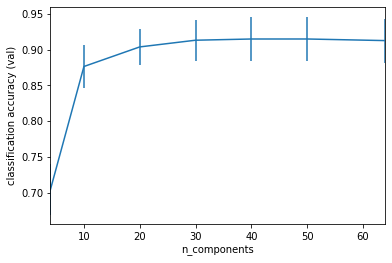

In [6]:
# 繪製不同採樣點的分類預測正確率
best_clfs = search_results.groupby('param_pca__n_components').apply(lambda x: x.nlargest(1, 'mean_test_score'))
best_clfs.plot(x='param_pca__n_components', y='mean_test_score', yerr='std_test_score', legend=False)
plt.xlabel('n_components')
plt.ylabel('classification accuracy (val)')
plt.show()

# 觀察結果
* PCA 解釋度: 解釋變異性隨著 components 穩定下降
* 分類預測準確率: 似乎也隨著 components 提升, 但是在 20 以後提升不多